In [38]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [39]:
class AgentState(TypedDict):
    name: str
    surname: str
    final: str

In [41]:
def capytalize_both_names(state: AgentState) -> AgentState:
    """
    Capytalizes both first and second names
    """
    state["name"] = state["name"].capitalize()
    state["surname"] = state["surname"].capitalize()
    return state

def finalize(state: AgentState) -> AgentState:
    """
    Fills final field that is name and surname
    """
    state["final"] = state["name"] + " " + state["surname"]
    return state

In [42]:
graph = StateGraph(AgentState)

graph.add_node("capytalize", capytalize_both_names)
graph.add_node("finalize", finalize)

graph.add_edge("capytalize", "finalize")

graph.set_entry_point("capytalize")
graph.set_finish_point("finalize")

app = graph.compile()

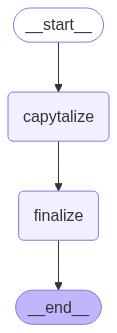

In [43]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [46]:
result = app.invoke({"name": "will", "surname": "smith", "final": ""})
result["final"]

'Will Smith'